# Querying the *flight phase files*

In [1]:
%load_ext autoreload
%autoreload 2;

Let's import some modules, that we need for the following examples:

In [2]:
import ac3airborne as ac3a
import flightphase as fp
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In order to select a flight and import its flight segments just use the corresponding method of the module *ac3airborne*.

In [3]:
campaign = 'ACLOUD'
aircraft = 'P5'
number   = 'RF14'
date     = '20170608'
flight   = campaign + '_' + aircraft + '_' + number

meta = ac3a.get_flight_segments()

yaml_content = meta[aircraft][flight]

We introduce here some new methods, that we will use to select the flight segments, querying for different criteria.

In [4]:
ds = fp.FlightPhaseFile(yaml_content)

We read the gps data of the whole flight

In [5]:
# read gps data
file = '~/ac3airborne/campaigns/'+campaign.lower()+'/'+aircraft.lower()+'/gps_ins/'+campaign+'_polar'+aircraft[1]+'_'+date+'_'+number+'.nc'
ds_gps = xr.open_dataset(file)

Plot the flight

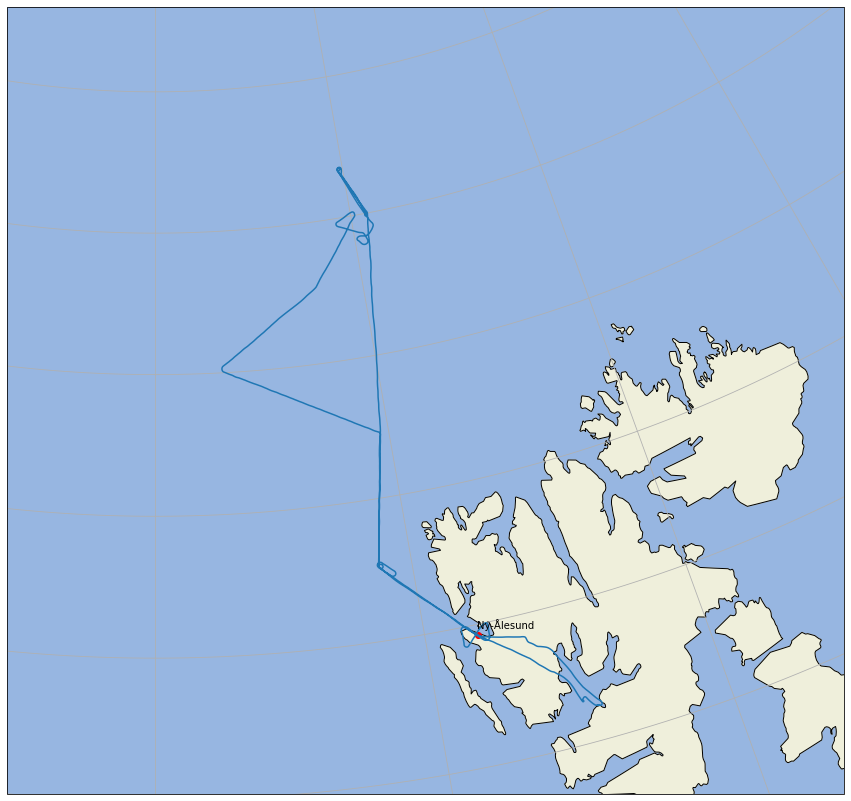

In [6]:
proj   = ccrs.NorthPolarStereo()
extent = (-5.0, 24.0, 78.0, 83.0)

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=proj)
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.gridlines()
ax.coastlines()

nya_lat = 78.924444
nya_lon = 11.928611

ax.plot(nya_lon, nya_lat, 'ro', transform=ccrs.PlateCarree())
ax.text(nya_lon, nya_lat+0.05, 'Ny-Ã…lesund', transform=ccrs.PlateCarree())

line_all = ax.plot(ds_gps.lon, ds_gps.lat, transform=ccrs.PlateCarree())

### Query all segments of a specific kind

Example with one kind

In [7]:
queried = ds.selectKind(['high_level'])

df = pd.DataFrame(queried)
df

dropsondes                 end  \
0                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 08:25:57   
1  {'BAD': [], 'GOOD': ['P5_RF14_sonde02'], 'UGLY... 2017-06-08 08:58:26   
2  {'BAD': [], 'GOOD': ['P5_RF14_sonde03'], 'UGLY... 2017-06-08 09:30:30   
3  {'BAD': [], 'GOOD': ['P5_RF14_sonde04'], 'UGLY... 2017-06-08 09:51:04   
4  {'BAD': [], 'GOOD': ['P5_RF14_sonde05'], 'UGLY... 2017-06-08 10:00:14   
5  {'BAD': ['P5_RF14_sonde06'], 'GOOD': [], 'UGLY... 2017-06-08 11:52:57   
6  {'BAD': [], 'GOOD': ['P5_RF14_sonde07'], 'UGLY... 2017-06-08 12:05:14   

  irregularities                              kinds  levels          name  \
0             []                       [high_level]  [9800]  high level 1   
1             []                       [high_level]  [9800]  high level 2   
2             []  [high_level, a-train_underflight]  [9700]  high level 3   
3             []                       [high_level]  [9700]  high level 4   
4             []                       [high_level]  [9800]  high level 5   
5             []                       [high_level]  [9700]  high level 8   
6             []                       [high_level]  [9800]  high level 9   

  parts           segment_id               start  
0    []  ACLOUD_P5_RF14_hl01 2017-06-08 08:08:54  
1    []  ACLOUD_P5_RF14_hl02 2017-06-08 08:36:30  
2    []  ACLOUD_P5_RF14_hl03 2017-06-08 08:59:08  
3    []  ACLOUD_P5_RF14_hl04 2017-06-08 09:31:41  
4    []  ACLOUD_P5_RF14_hl05 2017-06-08 09:51:33  
5   NaN  ACLOUD_P5_RF14_hl08 2017-06-08 11:11:20  
6   NaN  ACLOUD_P5_RF14_hl09 2017-06-08 11:53:38

Plot the selected segments:

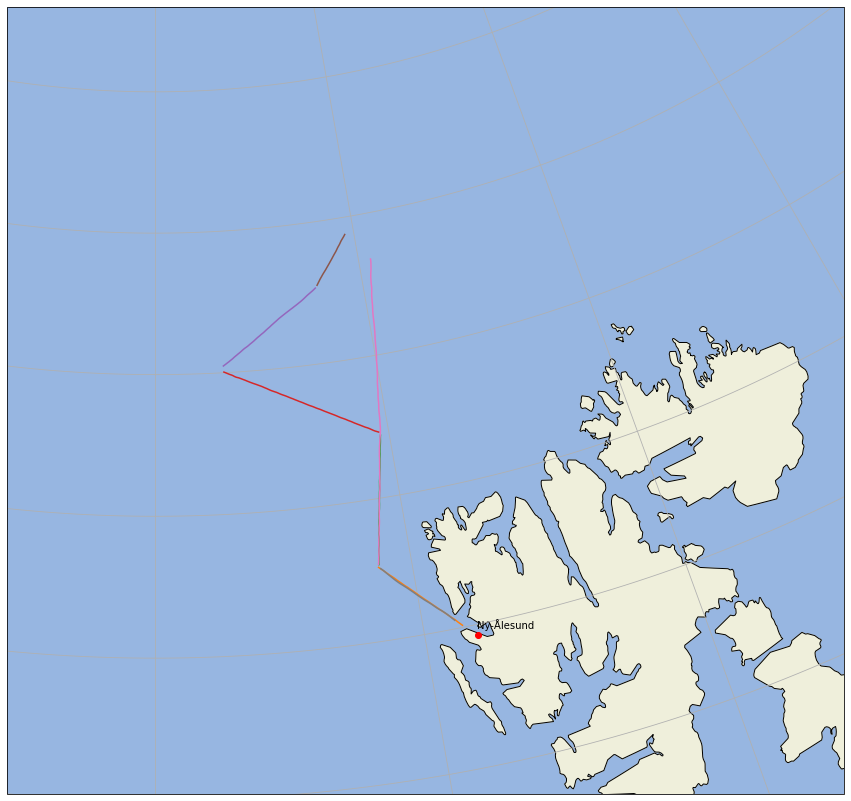

In [8]:
ll = line_all.pop(0)
ll.remove()

lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

 Example with more than one kind

In [9]:
kinds = ['a-train_underflight', 'nya_overflight', 'polarstern_overflight']

queried = ds.selectKind(kinds)

df = pd.DataFrame(queried)
df

dropsondes                 end  \
0                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 08:08:54   
1  {'BAD': [], 'GOOD': ['P5_RF14_sonde03'], 'UGLY... 2017-06-08 09:30:30   
2                                                NaN 2017-06-08 10:10:51   
3                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 12:25:40   

          irregularities                                              kinds  \
0  [whale-watching loop]  [major_ascend, nya_overflight, low_level_Sveab...   
1                     []                  [high_level, a-train_underflight]   
2                     []             [cross_pattern, polarstern_overflight]   
3                     []                    [cross_pattern, nya_overflight]   

               levels             name           segment_id  \
0         [100, 9700]     major ascend    ACLOUD_P5_RF14_ma   
1              [9700]     high level 3  ACLOUD_P5_RF14_hl03   
2        [9600, 9700]  cross pattern 1  ACLOUD_P5_RF14_cp01   
3  [9800, 9800, 9800]  cross pattern 2  ACLOUD_P5_RF14_cp02   

                start                                              parts  
0 2017-06-08 07:36:50                                                NaN  
1 2017-06-08 08:59:08                                                 []  
2 2017-06-08 10:00:14  [{'end': 2017-06-08 10:03:14, 'irregularities'...  
3 2017-06-08 12:05:14  [{'end': 2017-06-08 12:10:14, 'irregularities'...

Plot the selected segments:

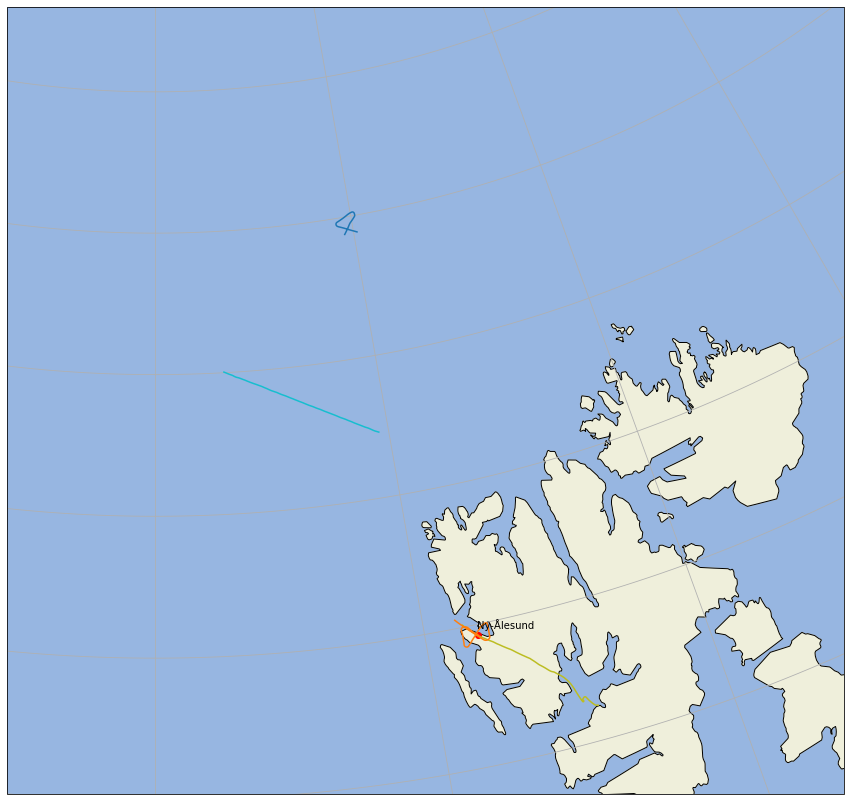

In [10]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

### Sorting out all segments given a list of kinds

In [11]:
sort_out = ['short_turn', 'holding_pattern', 'major_ascend', 'major_descend', 'high_level']

queried = ds.selectKind(sort_out, invertSelection=True)

df = pd.DataFrame(queried)
df

end             irregularities  \
0 2017-06-08 10:10:51                         []   
1 2017-06-08 10:22:44  [not along straight line]   
2 2017-06-08 11:02:02                         []   
3 2017-06-08 11:11:20                         []   
4 2017-06-08 12:25:40                         []   

                                    kinds                  levels  \
0  [cross_pattern, polarstern_overflight]            [9600, 9700]   
1                         [large_descend]             [9700, 200]   
2                     [racetrack pattern]  [200, 300, 1500, 2400]   
3                          [large_ascend]            [2400, 9700]   
4         [cross_pattern, nya_overflight]      [9800, 9800, 9800]   

                  name                                              parts  \
0      cross pattern 1  [{'end': 2017-06-08 10:03:14, 'irregularities'...   
1        large descend                                                NaN   
2  racetrack pattern 1  [{'end': 2017-06-08 10:29:21, 'irregularities'...   
3       large ascend 2                                                NaN   
4      cross pattern 2  [{'end': 2017-06-08 12:10:14, 'irregularities'...   

            segment_id               start  \
0  ACLOUD_P5_RF14_cp01 2017-06-08 10:00:14   
1  ACLOUD_P5_RF14_ld01 2017-06-08 10:10:51   
2  ACLOUD_P5_RF14_rt01 2017-06-08 10:22:44   
3  ACLOUD_P5_RF14_la02 2017-06-08 11:02:25   
4  ACLOUD_P5_RF14_cp02 2017-06-08 12:05:14   

                            dropsondes  
0                                  NaN  
1  {'BAD': [], 'GOOD': [], 'UGLY': []}  
2  {'BAD': [], 'GOOD': [], 'UGLY': []}  
3  {'BAD': [], 'GOOD': [], 'UGLY': []}  
4  {'BAD': [], 'GOOD': [], 'UGLY': []}

Plot the selected segments:

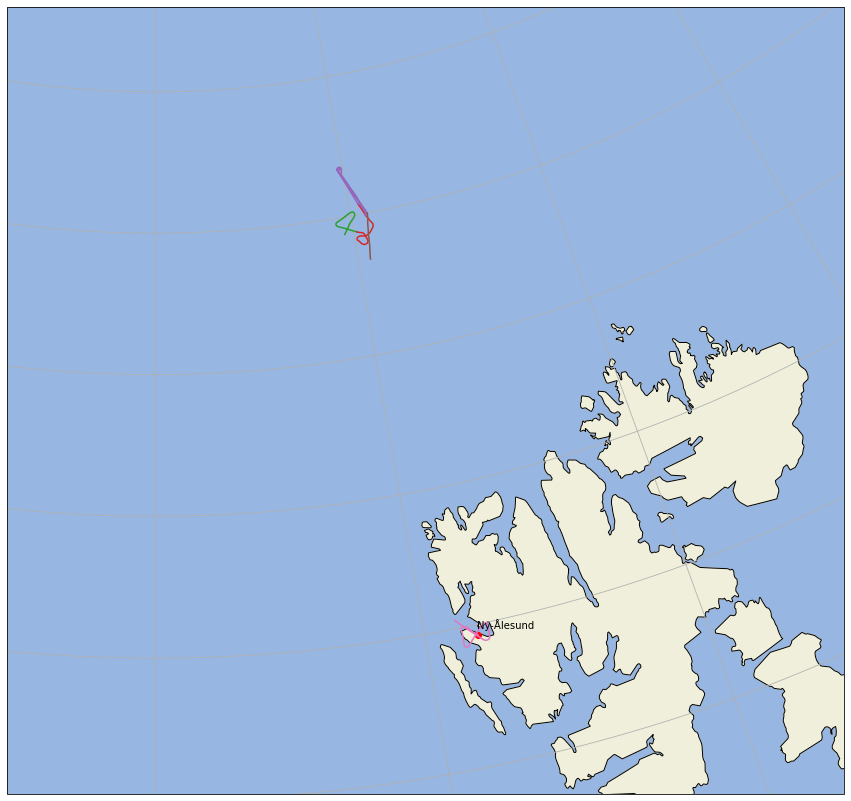

In [12]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

### Query a segment with a specific value in a specific attribute

#### Example 1: Select element with specific name

In [13]:
attribute = 'name'
value = 'racetrack pattern 1'

queried = ds.select(attribute, value) 

df = pd.DataFrame(queried)
df

dropsondes                 end irregularities  \
0  {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 11:02:02             []   

                 kinds                  levels                 name  \
0  [racetrack pattern]  [200, 300, 1500, 2400]  racetrack pattern 1   

                                               parts           segment_id  \
0  [{'end': 2017-06-08 10:29:21, 'irregularities'...  ACLOUD_P5_RF14_rt01   

                start  
0 2017-06-08 10:22:44

Plot the selected elements:

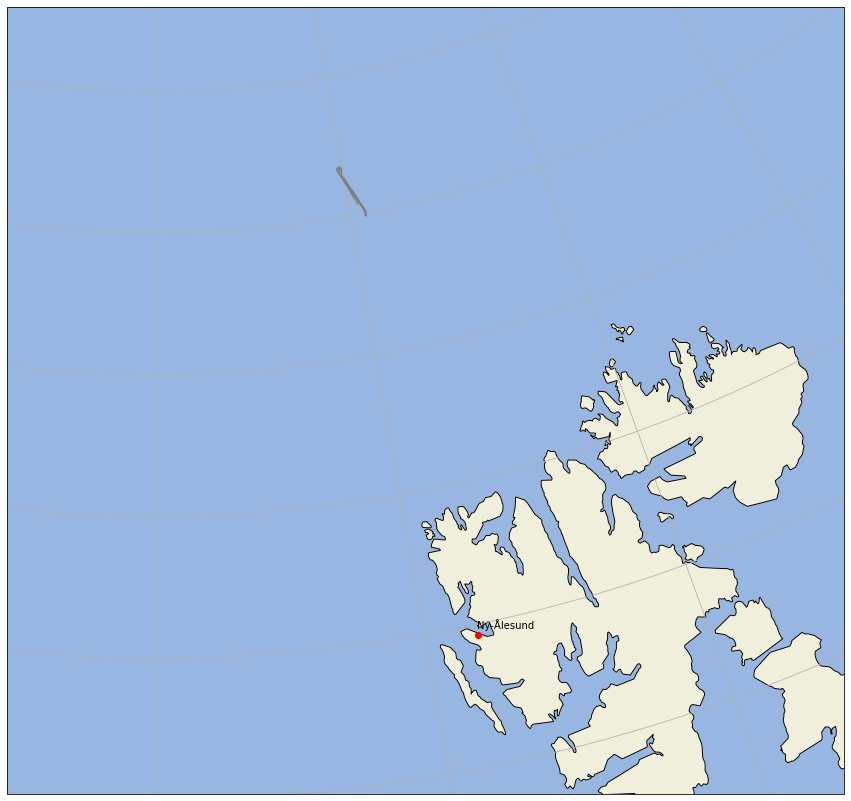

In [14]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

Also with inverted selection

In [15]:
queried = ds.select(attribute, value, invertSelection=True) 

df = pd.DataFrame(queried)
df

dropsondes                 end  \
0                 {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 08:08:54   
1                 {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 08:25:57   
2                 {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 08:36:30   
3   {'BAD': [], 'GOOD': ['P5_RF14_sonde02'], 'UGLY... 2017-06-08 08:58:26   
4                                                 NaN 2017-06-08 08:59:08   
5   {'BAD': [], 'GOOD': ['P5_RF14_sonde03'], 'UGLY... 2017-06-08 09:30:30   
6                                                 NaN 2017-06-08 09:31:41   
7   {'BAD': [], 'GOOD': ['P5_RF14_sonde04'], 'UGLY... 2017-06-08 09:51:04   
8                                                 NaN 2017-06-08 09:51:33   
9   {'BAD': [], 'GOOD': ['P5_RF14_sonde05'], 'UGLY... 2017-06-08 10:00:14   
10                                                NaN 2017-06-08 10:10:51   
11                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 10:22:44   
12                                                NaN 2017-06-08 11:02:25   
13                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 11:11:20   
14  {'BAD': ['P5_RF14_sonde06'], 'GOOD': [], 'UGLY... 2017-06-08 11:52:57   
15                                                NaN 2017-06-08 11:53:38   
16  {'BAD': [], 'GOOD': ['P5_RF14_sonde07'], 'UGLY... 2017-06-08 12:05:14   
17                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 12:25:40   
18                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 12:51:25   

               irregularities  \
0       [whale-watching loop]   
1                          []   
2                          []   
3                          []   
4                         NaN   
5                          []   
6                         NaN   
7                          []   
8                         NaN   
9                          []   
10                         []   
11  [not along straight line]   
12                        NaN   
13                         []   
14                         []   
15                        NaN   
16                         []   
17                         []   
18                         []   

                                                kinds              levels  \
0   [major_ascend, nya_overflight, low_level_Sveab...         [100, 9700]   
1                                        [high_level]              [9800]   
2                                   [holding_pattern]        [9800, 9800]   
3                                        [high_level]              [9800]   
4                                        [short_turn]                 NaN   
5                   [high_level, a-train_underflight]              [9700]   
6                                        [short_turn]                 NaN   
7                                        [high_level]              [9700]   
8                                        [short_turn]                 NaN   
9                                        [high_level]              [9800]   
10             [cross_pattern, polarstern_overflight]        [9600, 9700]   
11                                    [large_descend]         [9700, 200]   
12                                       [short_turn]                 NaN   
13                                     [large_ascend]        [2400, 9700]   
14                                       [high_level]              [9700]   
15                                       [short_turn]                 NaN   
16                                       [high_level]              [9800]   
17                    [cross_pattern, nya_overflight]  [9800, 9800, 9800]   
18                                    [major_descend]         [9800, 100]   

                 name           segment_id               start  \
0        major ascend    ACLOUD_P5_RF14_ma 2017-06-08 07:36:50   
1        high level 1  ACLOUD_P5_RF14_hl01 2017-06-08 08:08:54   
2   holding pattern 1  ACLOUD_P5_RF14_ho01 2017-06-08 08:25:57   
3        high level 2  ACLOUD_P5_RF1

Plot the selected elements:

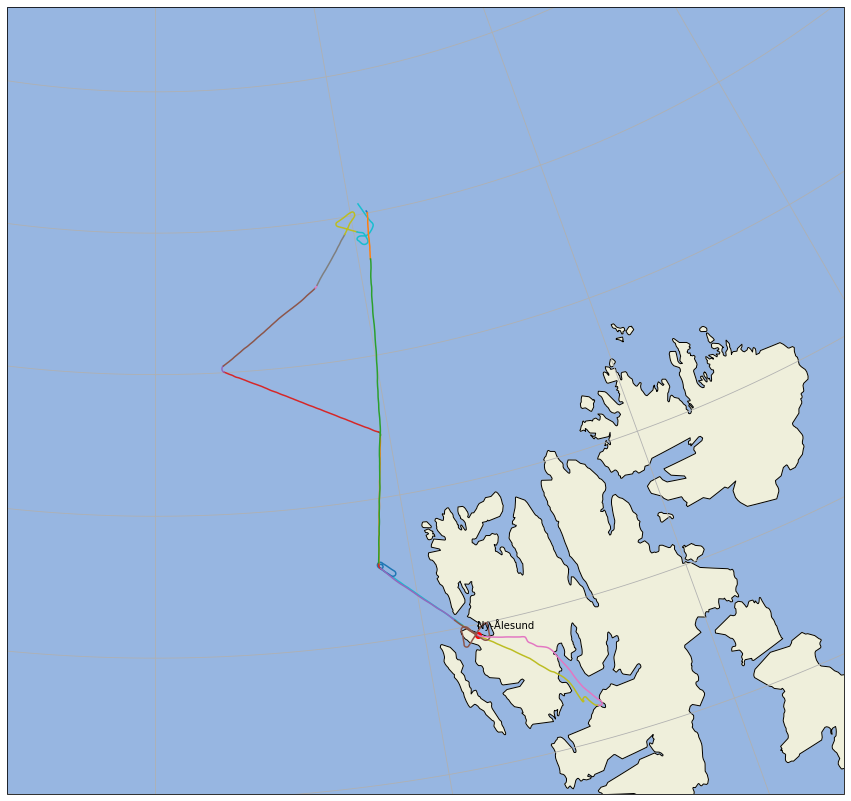

In [16]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

#### Example 2: Specific level

In [17]:
attribute = 'levels'
value = 9800

queried = ds.select(attribute, value)

df = pd.DataFrame(queried)
df

dropsondes                 end  \
0                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 08:25:57   
1                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 08:36:30   
2  {'BAD': [], 'GOOD': ['P5_RF14_sonde02'], 'UGLY... 2017-06-08 08:58:26   
3  {'BAD': [], 'GOOD': ['P5_RF14_sonde05'], 'UGLY... 2017-06-08 10:00:14   
4  {'BAD': [], 'GOOD': ['P5_RF14_sonde07'], 'UGLY... 2017-06-08 12:05:14   
5                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 12:25:40   
6                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 12:51:25   

  irregularities                            kinds              levels  \
0             []                     [high_level]              [9800]   
1             []                [holding_pattern]        [9800, 9800]   
2             []                     [high_level]              [9800]   
3             []                     [high_level]              [9800]   
4             []                     [high_level]              [9800]   
5             []  [cross_pattern, nya_overflight]  [9800, 9800, 9800]   
6             []                  [major_descend]         [9800, 100]   

                name                                              parts  \
0       high level 1                                                 []   
1  holding pattern 1  [{'end': 2017-06-08 08:27:33, 'kinds': ['short...   
2       high level 2                                                 []   
3       high level 5                                                 []   
4       high level 9                                                NaN   
5    cross pattern 2  [{'end': 2017-06-08 12:10:14, 'irregularities'...   
6      major descend                                                NaN   

            segment_id               start  
0  ACLOUD_P5_RF14_hl01 2017-06-08 08:08:54  
1  ACLOUD_P5_RF14_ho01 2017-06-08 08:25:57  
2  ACLOUD_P5_RF14_hl02 2017-06-08 08:36:30  
3  ACLOUD_P5_RF14_hl05 2017-06-08 09:51:33  
4  ACLOUD_P5_RF14_hl09 2017-06-08 11:53:38  
5  ACLOUD_P5_RF14_cp02 2017-06-08 12:05:14  
6    ACLOUD_P5_RF14_md 2017-06-08 12:25:40

Plot the selected elements:

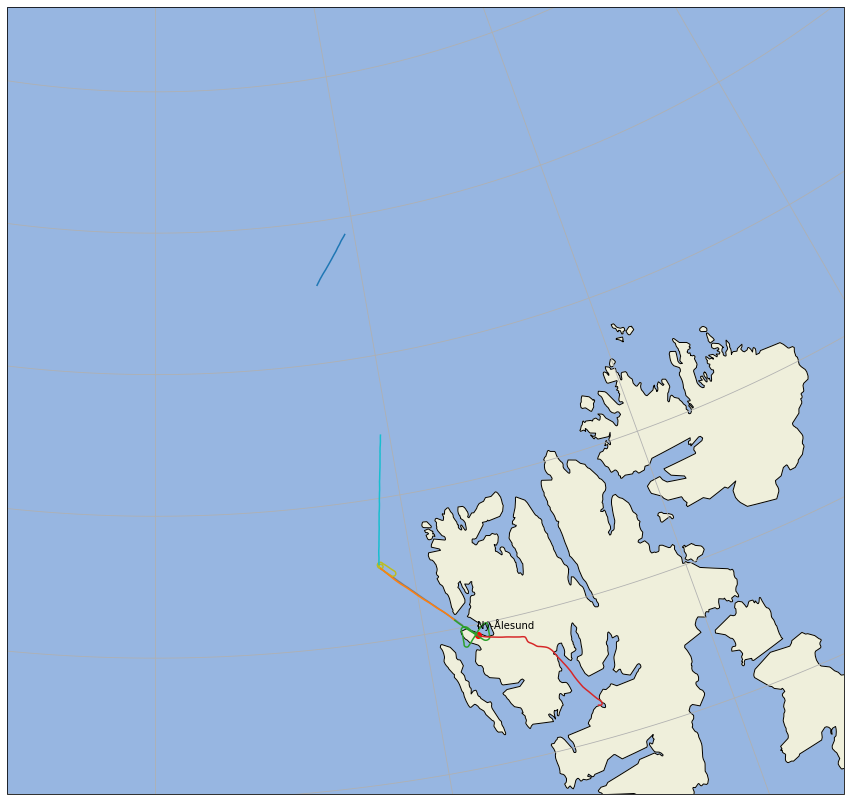

In [18]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

But what if we want only a specific level without ascend and descend? We can require that the attribute value is strictly equal to the one, that we give, i.e. thare no other values:

In [19]:
queried = ds.select(attribute, value, strict=True)

df = pd.DataFrame(queried)
df

dropsondes                 end  \
0                {'BAD': [], 'GOOD': [], 'UGLY': []} 2017-06-08 08:25:57   
1  {'BAD': [], 'GOOD': ['P5_RF14_sonde02'], 'UGLY... 2017-06-08 08:58:26   
2  {'BAD': [], 'GOOD': ['P5_RF14_sonde05'], 'UGLY... 2017-06-08 10:00:14   
3  {'BAD': [], 'GOOD': ['P5_RF14_sonde07'], 'UGLY... 2017-06-08 12:05:14   

  irregularities         kinds  levels          name parts  \
0             []  [high_level]  [9800]  high level 1    []   
1             []  [high_level]  [9800]  high level 2    []   
2             []  [high_level]  [9800]  high level 5    []   
3             []  [high_level]  [9800]  high level 9   NaN   

            segment_id               start  
0  ACLOUD_P5_RF14_hl01 2017-06-08 08:08:54  
1  ACLOUD_P5_RF14_hl02 2017-06-08 08:36:30  
2  ACLOUD_P5_RF14_hl05 2017-06-08 09:51:33  
3  ACLOUD_P5_RF14_hl09 2017-06-08 11:53:38

This functions only if the attribute has more values, as for level or kind. Now plot the selected elements:

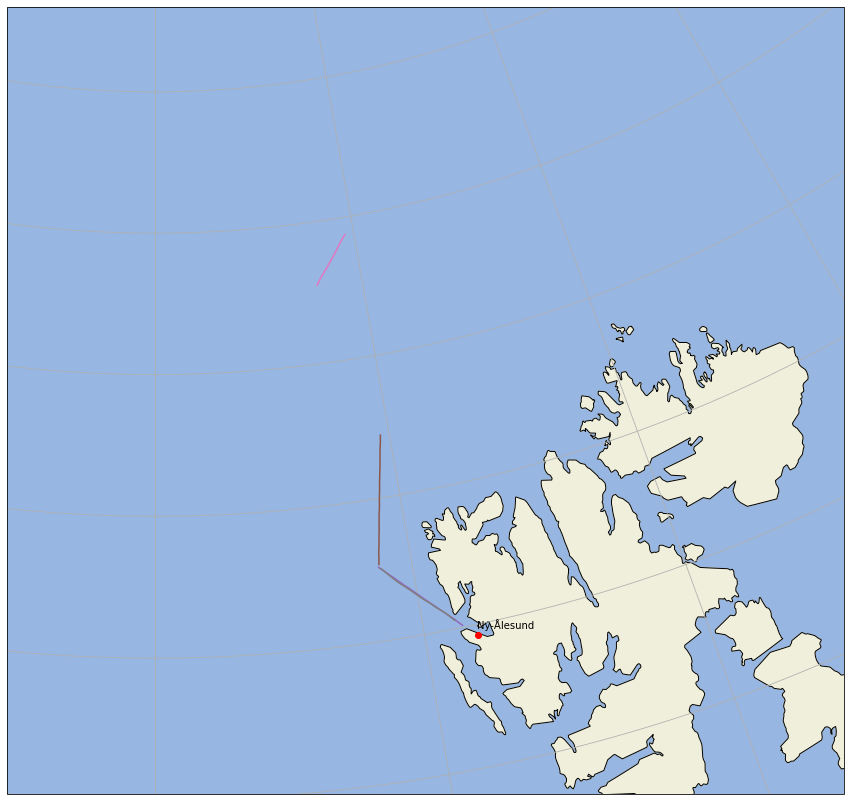

In [20]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

### Query all segments with good (or bad) dropsondes

In [21]:
queried = ds.selectDropSondes('GOOD')

df = pd.DataFrame(queried)
df

dropsondes                 end  \
0  {'BAD': [], 'GOOD': ['P5_RF14_sonde02'], 'UGLY... 2017-06-08 08:58:26   
1  {'BAD': [], 'GOOD': ['P5_RF14_sonde03'], 'UGLY... 2017-06-08 09:30:30   
2  {'BAD': [], 'GOOD': ['P5_RF14_sonde04'], 'UGLY... 2017-06-08 09:51:04   
3  {'BAD': [], 'GOOD': ['P5_RF14_sonde05'], 'UGLY... 2017-06-08 10:00:14   
4  {'BAD': [], 'GOOD': ['P5_RF14_sonde07'], 'UGLY... 2017-06-08 12:05:14   

  irregularities                              kinds  levels          name  \
0             []                       [high_level]  [9800]  high level 2   
1             []  [high_level, a-train_underflight]  [9700]  high level 3   
2             []                       [high_level]  [9700]  high level 4   
3             []                       [high_level]  [9800]  high level 5   
4             []                       [high_level]  [9800]  high level 9   

  parts           segment_id               start  
0    []  ACLOUD_P5_RF14_hl02 2017-06-08 08:36:30  
1    []  ACLOUD_P5_RF14_hl03 2017-06-08 08:59:08  
2    []  ACLOUD_P5_RF14_hl04 2017-06-08 09:31:41  
3    []  ACLOUD_P5_RF14_hl05 2017-06-08 09:51:33  
4   NaN  ACLOUD_P5_RF14_hl09 2017-06-08 11:53:38

Plot the selected elements:

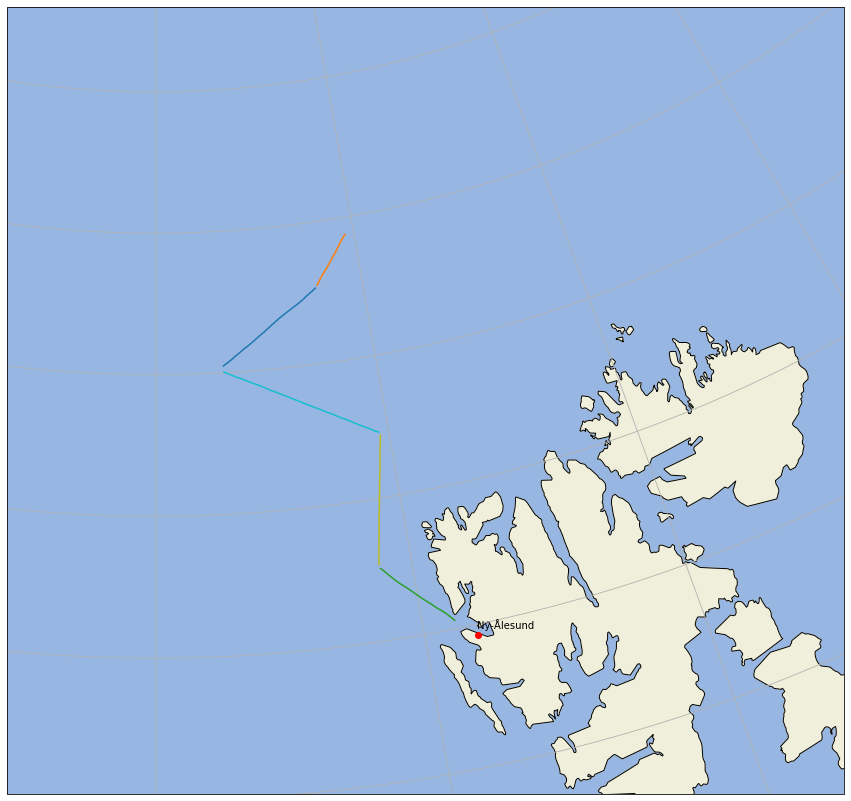

In [22]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig

In [23]:
queried = ds.selectDropSondes('BAD')

df = pd.DataFrame(queried)
df

dropsondes                 end  \
0  {'BAD': ['P5_RF14_sonde06'], 'GOOD': [], 'UGLY... 2017-06-08 11:52:57   

  irregularities         kinds  levels          name           segment_id  \
0             []  [high_level]  [9700]  high level 8  ACLOUD_P5_RF14_hl08   

                start  
0 2017-06-08 11:11:20

Plot the selected elements:

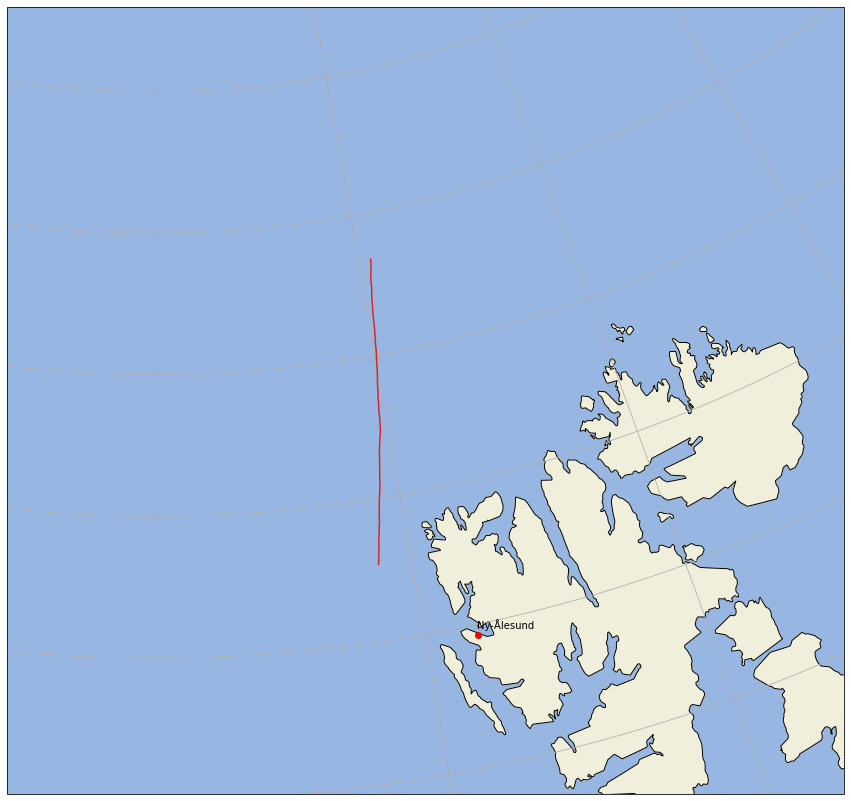

In [24]:
for l in lines:
    ll = l.pop(0)
    ll.remove()
    
lines = []
for q in queried:
    start = q['start']
    end   = q['end']
    
    line = ax.plot(ds_gps.lon.sel(time=slice(start, end)),
                   ds_gps.lat.sel(time=slice(start, end)),
                   transform=ccrs.PlateCarree())
    lines.append(line)
    
fig